In [2]:
from keras.datasets import fashion_mnist

In [3]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'get_file',
 'gzip',
 'keras_export',
 'load_data',
 'np',
 'os']

In [4]:
help(fashion_mnist)

Help on module keras.datasets.fashion_mnist in keras.datasets:

NAME
    keras.datasets.fashion_mnist - Fashion-MNIST dataset.

FUNCTIONS
    load_data()
        Loads the Fashion-MNIST dataset.
        
        This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
        along with a test set of 10,000 images. This dataset can be used as
        a drop-in replacement for MNIST.
        
        The classes are:
        
        | Label | Description |
        |:-----:|-------------|
        |   0   | T-shirt/top |
        |   1   | Trouser     |
        |   2   | Pullover    |
        |   3   | Dress       |
        |   4   | Coat        |
        |   5   | Sandal      |
        |   6   | Shirt       |
        |   7   | Sneaker     |
        |   8   | Bag         |
        |   9   | Ankle boot  |
        
        Returns:
          Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
        
        **x_train**: uint8 NumPy array of grayscale image d

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<Figure size 432x288 with 0 Axes>

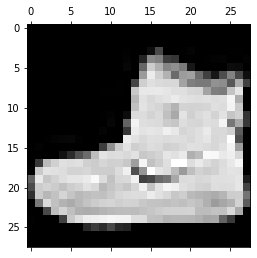

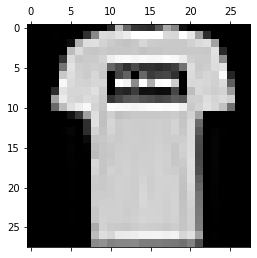

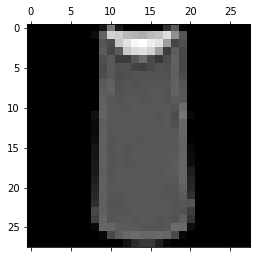

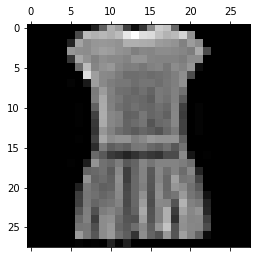

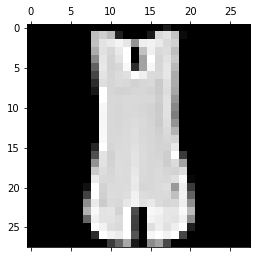

In [8]:
plt.gray()
for i in range(5):
  plt.matshow(x_train[i])

In [9]:
# reshape data to single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
x_train.dtype

dtype('uint8')

In [12]:
# convert datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train.dtype

dtype('float32')

In [14]:
x_train.max()

255.0

In [15]:
x_train.min()

0.0

In [16]:
# rescaling
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train.max()

1.0

In [18]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
import pandas as pd

y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [20]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [21]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2412 - accuracy: 0.9120
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2265 - accuracy: 0.9172
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2100 - accuracy: 0.9231
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1977 - accuracy: 0.9277
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1840 - accuracy: 0.9329
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1745 - accuracy: 0.9365
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1661 - accuracy: 0.9390
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1520 - accuracy: 0.9444
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1432 - accuracy: 0.9479
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1318 - accuracy: 0.9518

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.3580 - accuracy: 0.8716
Test loss 0.3579595386981964
Test accuracy 0.8715999722480774


In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred[0]

array([3.1503332e-06, 1.5641162e-09, 1.8574110e-07, 5.9753179e-06,
       4.7453182e-07, 3.8405168e-03, 9.3566638e-07, 5.2660033e-02,
       1.5175334e-04, 9.4333696e-01], dtype=float32)

In [39]:
y_test_max = np.argmax(np.round(y_test), axis=1)
y_pred_max = np.argmax(np.round(y_pred), axis=1)

In [40]:
y_test_max[0]

9

In [41]:
y_pred_max[0]

9

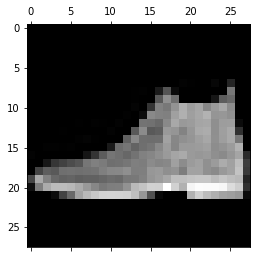

In [42]:
plt.matshow(x_test[0].reshape(28,28))

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_max, y_pred_max)
print(cm)

[[915   0  14  13   4   4  43   0   7   0]
 [ 11 964   0  20   3   0   0   0   2   0]
 [ 94   0 794   5  84   0  22   0   1   0]
 [113   4  12 812  47   0  11   0   1   0]
 [ 67   1  57   8 841   0  25   0   1   0]
 [  4   0   0   0   0 934   0  49   0  13]
 [328   0  88  15 115   0 446   0   8   0]
 [  3   0   0   0   0   7   0 968   1  21]
 [ 24   1   5   2   3   3   4   5 953   0]
 [  1   0   0   0   0   4   0  55   1 939]]


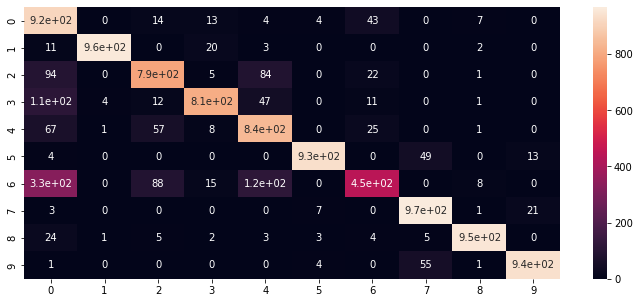

In [44]:
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True)

In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test_max, y_pred_max)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.92      0.71      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.79      0.81      1000
           3       0.93      0.81      0.87      1000
           4       0.77      0.84      0.80      1000
           5       0.98      0.93      0.96      1000
           6       0.81      0.45      0.58      1000
           7       0.90      0.97      0.93      1000
           8       0.98      0.95      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.85     10000
weighted avg       0.87      0.86      0.85     10000

